In [100]:
# Instalando pacote do Yahoo Finance
#pip install yfinance

In [101]:
#pip install pandas_datareader

In [102]:
#pip install plotly

In [103]:
# Pacotes de análise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Pacotes de data e hora
from datetime import datetime

# Pacote do Yahoo Finance
import yfinance as yf
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

API Yahoo Finance

https://finance.yahoo.com/

In [104]:
dados = web.get_data_yahoo('PETR4.SA', period='1y')

[*********************100%***********************]  1 of 1 completed


In [105]:
dados.shape

(252, 6)

In [106]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981436,65689000
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244417,65811600
2022-02-17,32.849998,33.290001,32.549999,32.799999,19.168444,43255200
2022-02-18,32.570000,33.090000,32.270000,33.000000,19.285326,60304700


In [107]:
dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300
2023-02-10,25.980000,26.790001,25.930000,26.719999,26.719999,54683100
2023-02-13,26.690001,26.889999,26.370001,26.799999,26.799999,36726900
2023-02-14,26.850000,27.059999,26.600000,26.740000,26.740000,20269500


In [108]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.890437,30.425556,29.348929,29.901706,23.453803,8.160466e+07
std,3.666866,3.685120,3.621055,3.648205,3.525846,3.709082e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.026950e+07
25%,26.842500,27.492500,26.167500,26.797500,20.123456,5.608975e+07
50%,30.605000,31.264999,29.965000,30.535000,23.396103,7.266555e+07
75%,32.700001,33.454999,32.297501,32.937500,26.086003,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [109]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-14 to 2023-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


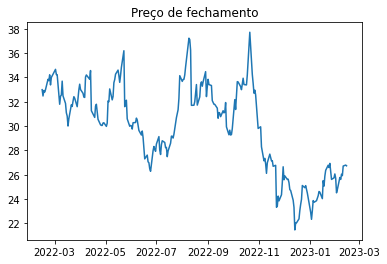

In [110]:
# Histograma
plt.plot(dados['Close'])
plt.title('Preço de fechamento');

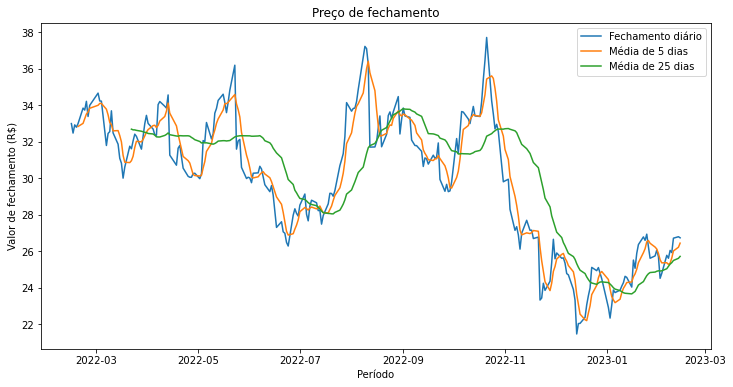

In [111]:
# Média móvel
plt.figure(figsize=(12,6))
plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=5).mean())
plt.plot(dados['Close'].rolling(window=25).mean())
plt.title('Preço de fechamento')
plt.legend(['Fechamento diário', 'Média de 5 dias', 'Média de 25 dias'])
plt.ylabel('Valor de fechamento (R$)')
plt.xlabel('Período');

In [112]:
dados['media_movel5'] = dados['Close'].rolling(window=5).mean()
dados['media_movel25'] = dados['Close'].rolling(window=25).mean()

In [113]:
figure1 = px.line(
    dados,
    y='Close',
    title='Preço de Fechamento')

figure1.show()

In [114]:
figure2 = go.Figure(
    data=go.Scatter(
        x=dados.index,
        y=dados['Close'],
        line=(dict(color='firebrick', width=3))
    )
)
figure2.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Valor de fechamento (R$)'
)
figure2.show()

In [115]:
# Gráfico candlestick

candlestick =  go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            #increasing_line_color='darkblue',
            #decreasing_line_color='orange'
        )
    ]
)

candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Valor de fechamento (R$)'
)

candlestick.show()

In [116]:
# Definindo a figura do relatório
figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e dimensão

figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b><br>Follow-up Petrobras'
)

# Adicionando um gráfico na primeira posição

figura.add_trace(
    go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            #increasing_line_color='darkblue',
            #decreasing_line_color='orange'
        ),
    row=1, col=1
)

figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionando um gráfico na segunda posição

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Close'],
        mode='lines',
        name='Fechamento',
        line=(dict(color='darkorchid'))
    ),
    row=2, col=1
)

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['media_movel5'],
        mode='lines',
        name='Média móvel 5 dias',
        line=(dict(color='orange'))
    ),
    row=2, col=1
)

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['media_movel25'],
        mode='lines',
        name='Média móvel 25 dias',
        line=(dict(color='hotpink'))
    ),
    row=2, col=1
)

figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.05,
        xanchor='right',
        x=1,
        font=dict(size=10)
    )
)

figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python oferecido pela Data Viking',
    font=dict(size=10),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
    
)

figura.add_annotation(
    showarrow=False,
    text='Elaborado por Rogério Silva',
    font=dict(size=10),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
    
)

# Visualizando a figura

figura.show()

In [117]:
#pip install -U kaleido

In [118]:
figura.write_image('Reporte financeiro - PETR4.pdf', format="pdf")